In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
SP_all_monthly = pd.read_csv('SP_all_monthly.csv')
SP_all_monthly = SP_all_monthly.dropna()

In [3]:
SP_all_monthly['year_month'] = pd.to_datetime(SP_all_monthly.year_month)
SP_all_monthly = SP_all_monthly.sort_values('year_month', ascending=True, ignore_index=True)
SP_all_monthly['Year'] = SP_all_monthly['year_month'].dt.year
SP_all_monthly['Month'] = SP_all_monthly['year_month'].dt.month 
SP_all_monthly = SP_all_monthly.set_index('year_month')
SP_all_monthly

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,Close_t+1,t+1_return(%),t+1_return_class,t_3m_Close,...,Nk_Close,Nk_Volume,fx_Price,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index,Year,Month
year_month,,,,,,,,,,,,,,,,,,,,,
1985-02-01,179.63,181.18,2.194620e+09,179.63,0.862885,1,180.66,-0.287007,1.0,8.190,...,12321.919922,0,1.3835,4.24,24.870001,21.990000,21.29,93.7,1985,2
1985-03-01,181.18,180.66,2.153090e+09,181.18,-0.287007,1,179.83,-0.459427,1.0,8.660,...,12580.759766,0,1.3675,-1.16,24.870001,21.990000,21.33,93.7,1985,3
1985-04-01,180.66,179.83,1.981880e+09,180.66,-0.459427,1,189.55,5.405105,2.0,8.150,...,12426.290039,0,1.3670,-0.04,24.870001,21.990000,21.30,94.6,1985,4
1985-05-01,179.83,189.55,2.350340e+09,179.83,5.405105,2,191.85,1.213400,1.0,7.750,...,12758.459961,0,1.3745,0.55,24.870001,21.990000,21.30,91.8,1985,5
1985-06-01,189.55,191.85,2.117000e+09,189.55,1.213400,1,190.92,-0.484754,1.0,7.750,...,12882.089844,0,1.3592,-1.11,24.870001,21.990000,21.31,96.5,1985,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4540.32,4131.93,7.478485e+10,4530.41,-8.795672,0,4132.15,0.005324,1.0,0.500,...,26847.900391,1345900000,1.2856,2.86,20.620001,33.400002,64.21,65.2,2022,4
2022-05-01,4130.61,4132.15,8.912813e+10,4131.93,0.005324,1,3785.38,-8.391999,0.0,0.500,...,27279.800781,1582900000,1.2644,-1.65,33.349998,26.190001,64.20,58.4,2022,5
2022-06-01,4149.78,3785.38,8.679906e+10,4132.15,-8.391999,0,4130.29,9.111635,2.0,1.103,...,26393.039063,1637700000,1.2872,1.80,26.049999,28.709999,64.01,50.0,2022,6


In [4]:
SP_all_monthly['R_Change%'] = (SP_all_monthly['R_Close'] - SP_all_monthly['R_Open'])/SP_all_monthly['R_Close'].shift(1) 
SP_all_monthly['G_Change%'] = (SP_all_monthly['G_Close'] - SP_all_monthly['G_Open'])/SP_all_monthly['G_Close'].shift(1)
SP_all_monthly['GF_Change%'] = (SP_all_monthly['GF_Close'] - SP_all_monthly['GF_Open'])/SP_all_monthly['GF_Close'].shift(1)
SP_all_monthly['Nas_Change%'] = (SP_all_monthly['Nas_Close'] - SP_all_monthly['Nas_Open'])/SP_all_monthly['Nas_Close'].shift(1)
SP_all_monthly['Nk_Change%'] = (SP_all_monthly['Nk_Close'] - SP_all_monthly['Nk_Open'])/SP_all_monthly['Nk_Close'].shift(1) 
SP_all_monthly['Vo_Change%'] = (SP_all_monthly['vo_Close'] - SP_all_monthly['vo_Open'])/SP_all_monthly['vo_Close'].shift(1) 

In [5]:
SP_all_monthly = SP_all_monthly.drop(['G_Open','G_Close','G_Volume','G_Change%','GF_Open','GF_Close','GF_Volume','GF_Change%'], axis=1)
#SP_all_monthly = SP_all_monthly.drop(['R_Close','R_Open','Nas_Close','Nas_Open',
#                     'Nk_Close','Nk_Open','vo_Close','vo_Open'],axis=1)

In [6]:
SP_all_monthly = SP_all_monthly[SP_all_monthly.index >= '2000-02-01']

In [7]:

SP_all_monthly = SP_all_monthly.dropna()
X = SP_all_monthly.drop(['Year','Month','Close_t+1','t+1_return(%)','t+1_return_class'], axis=1)
y = SP_all_monthly['t+1_return_class']

### Feature selection
Part 1: Removing Features With Small Variance

In [8]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
X_transformed = vt.fit_transform(X)

In [9]:
# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = X.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
X_transformed = pd.DataFrame(X_transformed, columns = selected_columns)

In [10]:
X_transformed

,S&P_Open,S&P_Close,S&P_Volume,Close_t-1,return(%),return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,...,Nas_Close,Nas_Volume,Nk_Open,Nk_Close,Nk_Volume,fx_change%,vo_Open,vo_Close,Div_Ratio,CS_Index
0,1394.46,1366.42,2.091200e+10,1394.46,-2.010814,1.0,5.550,6.617,170.000,0.6,...,4696.689941,3.564470e+10,19536.679688,19959.519531,0.000000e+00,0.21,24.430000,23.370001,29.21,111.3
1,1366.42,1498.58,2.615620e+10,1366.42,9.671990,2.0,5.600,6.379,171.000,-0.1,...,4572.830078,4.320049e+10,20030.080078,20337.320313,0.000000e+00,0.01,22.650000,24.110001,29.01,107.1
2,1498.58,1452.43,2.010646e+10,1498.58,-3.079582,0.0,5.600,6.379,170.900,0.2,...,3860.659912,3.514797e+10,20327.789063,17973.699219,0.000000e+00,2.20,24.990000,26.200001,28.96,109.2
3,1452.43,1420.60,1.989830e+10,1452.43,-2.191500,1.0,5.670,6.255,171.200,0.6,...,3400.909912,3.083198e+10,17979.250000,16332.450195,0.000000e+00,1.07,26.070000,23.650000,28.89,110.7
4,1420.60,1454.60,2.173830e+10,1420.60,2.393355,1.0,5.560,6.195,172.200,0.3,...,3966.110107,3.335238e+10,16320.080078,17411.050781,0.000000e+00,-1.10,23.200001,19.540001,28.71,106.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,4540.32,4131.93,7.478485e+10,4530.41,-8.795672,0.0,0.500,2.377,288.663,1.0,...,12334.639648,9.599430e+10,27624.109375,26847.900391,1.345900e+09,2.86,20.620001,33.400002,64.21,65.2
267,4130.61,4132.15,8.912813e+10,4131.93,0.005324,1.0,0.500,2.377,291.474,1.3,...,12081.389648,1.109477e+11,26851.099609,27279.800781,1.582900e+09,-1.65,33.349998,26.190001,64.20,58.4
268,4149.78,3785.38,8.679906e+10,4132.15,-8.391999,0.0,1.103,2.931,295.328,0.0,...,11028.740234,1.133446e+11,27295.630859,26393.039063,1.637700e+09,1.80,26.049999,28.709999,64.01,50.0
269,3781.00,4130.29,6.802114e+10,3785.38,9.111635,2.0,1.603,2.889,295.271,0.0,...,12390.690430,9.361941e+10,26460.710938,27801.640625,1.339300e+09,-0.61,29.530001,21.330000,64.01,51.5


Part 2: Removing Correlated Features

In [11]:
# step 1
X_corr = X_transformed.corr().abs()

# step 2
indices = np.where(X_corr > 0.9) 
indices = [(X_corr.index[x], X_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        X_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [12]:
print(indices)

[('S&P_Open', 'S&P_Close'), ('S&P_Open', 'Close_t-1'), ('S&P_Open', 'R_Open'), ('S&P_Open', 'R_Close'), ('S&P_Open', 'Nas_Open'), ('S&P_Open', 'Nas_Close'), ('S&P_Open', 'Nk_Open'), ('S&P_Open', 'Nk_Close'), ('S&P_Close', 'Close_t-1'), ('S&P_Close', 'R_Open'), ('S&P_Close', 'R_Close'), ('S&P_Close', 'Nas_Open'), ('S&P_Close', 'Nas_Close'), ('S&P_Close', 'Nk_Open'), ('S&P_Close', 'Nk_Close'), ('S&P_Volume', 'R_Volume'), ('Close_t-1', 'R_Open'), ('Close_t-1', 'R_Close'), ('Close_t-1', 'Nas_Open'), ('Close_t-1', 'Nas_Close'), ('Close_t-1', 'Nk_Open'), ('Close_t-1', 'Nk_Close'), ('cpi_Value', 'R_Open'), ('cpi_Value', 'R_Close'), ('cpi_Value', 'Div_Ratio'), ('R_Open', 'R_Close'), ('R_Open', 'Nas_Open'), ('R_Open', 'Nas_Close'), ('R_Open', 'Div_Ratio'), ('R_Close', 'Nas_Open'), ('R_Close', 'Nas_Close'), ('R_Close', 'Nk_Close'), ('R_Close', 'Div_Ratio'), ('Nas_Open', 'Nas_Close'), ('Nas_Open', 'Nk_Open'), ('Nas_Open', 'Nk_Close'), ('Nas_Close', 'Nk_Close'), ('Nk_Open', 'Nk_Close')]


In [13]:
X_transformed

,S&P_Open,S&P_Volume,return(%),return_class,t_3m_Close,t_10y_Close,cpi_Value,cpi_MoM%,oil_Price,unemp_rate,PE_Ratio,EY_Ratio,Nas_Volume,Nk_Volume,fx_change%,vo_Open,vo_Close,CS_Index
0,1394.46,2.091200e+10,-2.010814,1.0,5.550,6.617,170.000,0.6,29.366000,4.1,27.76,3.60,3.564470e+10,0.000000e+00,0.21,24.430000,23.370001,111.3
1,1366.42,2.615620e+10,9.671990,2.0,5.600,6.379,171.000,-0.1,29.841739,4.0,28.31,3.53,4.320049e+10,0.000000e+00,0.01,22.650000,24.110001,107.1
2,1498.58,2.010646e+10,-3.079582,0.0,5.600,6.379,170.900,0.2,25.722105,3.8,28.50,3.51,3.514797e+10,0.000000e+00,2.20,24.990000,26.200001,109.2
3,1452.43,1.989830e+10,-2.191500,1.0,5.670,6.255,171.200,0.6,28.788182,4.0,27.49,3.64,3.083198e+10,0.000000e+00,1.07,26.070000,23.650000,110.7
4,1420.60,2.173830e+10,2.393355,1.0,5.560,6.195,172.200,0.3,31.822273,4.0,28.16,3.55,3.335238e+10,0.000000e+00,-1.10,23.200001,19.540001,106.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,4540.32,7.478485e+10,-8.795672,0.0,0.500,2.377,288.663,1.0,101.777500,3.6,22.19,4.51,9.599430e+10,1.345900e+09,2.86,20.620001,33.400002,65.2
267,4130.61,8.912813e+10,0.005324,1.0,0.500,2.377,291.474,1.3,109.552381,3.6,20.42,4.90,1.109477e+11,1.582900e+09,-1.65,33.349998,26.190001,58.4
268,4149.78,8.679906e+10,-8.391999,0.0,1.103,2.931,295.328,0.0,114.837143,3.6,19.70,5.08,1.133446e+11,1.637700e+09,1.80,26.049999,28.709999,50.0
269,3781.00,6.802114e+10,9.111635,2.0,1.603,2.889,295.271,0.0,101.619000,3.5,19.77,5.06,9.361941e+10,1.339300e+09,-0.61,29.530001,21.330000,51.5


### Pipelining

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [15]:
# Data Splitting 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.15, random_state=27)

pipeline = Pipeline(steps=[('scaling', 'passthrough'),
                           ('classifier', 'passthrough')])


param_grid = {'scaling': [StandardScaler(), MinMaxScaler()],
              'classifier': [LogisticRegression(multi_class='multinomial'),
                             LinearDiscriminantAnalysis(), 
                             RandomForestClassifier(max_depth=10), 
                             GaussianNB(), 
                             SVC(probability=True), 
                             xgb.XGBClassifier()]
             }

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=2, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy:\n\t {best_acc}\nAchieved with hyperparameters:\n\t {best_hyperparams}')

Best test set accuracy:
	 0.6341463414634146
Achieved with hyperparameters:
	 {'classifier': GaussianNB(), 'scaling': StandardScaler()}


## Now let's see the final result.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.15, random_state=27) #shuffle=False

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NB_clf = GaussianNB()

# Naive Bayes
NB_clf.fit(X_train,y_train)
y_pred_NB = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_NB)
#score = precision_recall_fscore_support(y_test, y_pred_NB, average='weighted')
roc_score = roc_auc_score(y_test, NB_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.6341463414634146
Test set roc_auc_score: 0.6496969696969696


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.15, random_state=27) #shuffle=False

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg_clf = LogisticRegression(multi_class='multinomial')

# Naive Bayes
logreg_clf.fit(X_train,y_train)
y_pred_lr = logreg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
#score = precision_recall_fscore_support(y_test, y_pred_lr, average='weighted')
roc_score = roc_auc_score(y_test, logreg_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.6829268292682927
Test set roc_auc_score: 0.702550505050505


### Feature importance

<AxesSubplot:>

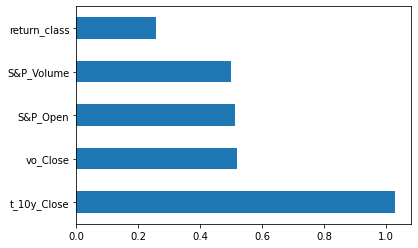

In [18]:
(pd.Series(logreg_clf.coef_[0], index=X_transformed.columns)
   .nlargest(5)
   .plot(kind='barh'))

### Let's compare the return this model could make vs actual return on dataset.

In [19]:
type(y_pred_lr)

numpy.ndarray

In [20]:
type(y_test)

pandas.core.series.Series

In [21]:
test_compare = y_test.to_frame()

In [22]:
test_compare['y_pred_lr'] = y_pred_lr

In [23]:
test_compare.head()

,t+1_return_class,y_pred_lr
year_month,,
2017-03-01,1.0,1.0
2017-06-01,1.0,1.0
2016-09-01,1.0,1.0
2005-07-01,1.0,1.0
2004-12-01,1.0,1.0


In [24]:
test_idx = test_compare.index

In [25]:
# actual return is the return we get when we keep holding the S&P index.
test_compare['actual_return']=SP_all_monthly.loc[test_idx]['t+1_return(%)']

In [26]:
test_compare.sample(5)

,t+1_return_class,y_pred_lr,actual_return
year_month,,,
2017-06-01,1.0,1.0,1.934877
2021-08-01,0.0,1.0,-4.756914
2010-01-01,1.0,1.0,2.851369
2014-05-01,1.0,1.0,1.905831
2012-07-01,1.0,1.0,1.976336


In [27]:
test_compare['y_pred_return'] = (test_compare['y_pred_lr'] )* test_compare['actual_return']

In [28]:
test_compare[['actual_return','y_pred_return']].sample(10)

,actual_return,y_pred_return
year_month,,
2011-09-01,10.772304,21.544608
2017-04-01,1.157621,1.157621
2004-02-01,-1.635894,-1.635894
2005-11-01,-0.095240,-0.095240
2009-09-01,-1.976199,-1.976199
2004-12-01,-2.529045,-2.529045
2008-12-01,-8.565735,-17.131470
2012-05-01,3.955492,7.910984
2000-07-01,6.069903,6.069903


In [29]:
print('Simple return on testset:', round(sum(test_compare['actual_return']),2),'%')

Simple return on testset: 11.58 %


In [30]:
print('Simple return on testset:',round(sum(test_compare['y_pred_return']),2),'%')

Simple return on testset: 21.1 %


#### This is for accumulative return for test dataset from April 2019 - August 2022.

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, shuffle=False) #shuffle=False

In [33]:
# Logistic regression
logreg_clf = LogisticRegression(multi_class = 'multinomial')
logreg_clf.fit(X_train,y_train)
y_pred_lr = logreg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
#score = precision_recall_fscore_support(y_test, y_pred_lr, average='weighted')
roc_score = roc_auc_score(y_test, logreg_clf.predict_proba(X_test), multi_class='ovr')
print(f'accuracy score: {accuracy}')
#print(f'Test set precision, recall, f-score: {score}')
print(f'Test set roc_auc_score: {roc_score}')

accuracy score: 0.43902439024390244
Test set roc_auc_score: 0.5850924838274617


In [34]:
test_compare_ts = y_test.to_frame()
test_compare_ts['y_pred_lr'] = y_pred_lr

In [35]:
test_idx = test_compare_ts.index
test_compare_ts['actual_return']=SP_all_monthly.loc[test_idx]['t+1_return(%)']
test_compare_ts['y_pred_return'] = (test_compare_ts['y_pred_lr'] )* test_compare_ts['actual_return']

In [36]:
act_return = test_compare_ts['actual_return'].values

In [37]:
act_return

array([-6.57777265e+00,  6.89301832e+00,  1.31281954e+00, -1.80916527e+00,
        1.71811677e+00,  2.04317475e+00,  3.40470641e+00,  2.85898032e+00,
       -1.62808981e-01, -8.41104690e+00, -1.25119321e+01,  1.26844103e+01,
        4.52817750e+00,  1.83884033e+00,  5.51012970e+00,  7.00646873e+00,
       -3.92279541e+00, -2.76657746e+00,  1.07545658e+01,  3.71214067e+00,
       -1.11366402e+00,  2.60914750e+00,  4.24386340e+00,  5.24253126e+00,
        5.48650258e-01,  2.22139763e+00,  2.27481094e+00,  2.89903214e+00,
       -4.75691404e+00,  6.91438733e+00, -8.33373142e-01,  4.36128750e+00,
       -5.25850891e+00, -3.13605209e+00,  3.57732388e+00, -8.79567191e+00,
        5.32438836e-03, -8.39199932e+00,  9.11163476e+00, -4.24401192e+00,
       -1.18356511e+00])

In [38]:
def accum_return(array):
    investment=100
    for value in array:
        investment= investment*(100+value)/100
    print(round(investment-100,2),'%')

In [39]:
accum_return(act_return)

32.67 %


In [40]:
accum_return(test_compare_ts['y_pred_return'])

26.97 %
